In [14]:
from Bio import SeqIO
import matplotlib.pyplot as plt
from pylab import *
import pandas as pd
from collections import defaultdict
%matplotlib inline
import numpy as np

In [15]:
# Have lat-long coordinates for these locations
known_locations = set(pd.read_csv('../source-data/geo_lat_long.tsv', sep='\t')['location'].values)

# Unique (region, country) pairs in the dengue data
dengue_locations = set(
                    tuple(s.description.split('|')[-4:-2]) 
                    for s in 
                    SeqIO.parse(open('../data/dengue.fasta', 'r'), 'fasta')
                    )

grouped_locations = defaultdict(set)
for region, country in dengue_locations:
    grouped_locations[region].add(country)

dengue_countries = set( i[1] for i in dengue_locations )

missing_coordinates = dengue_countries.difference(known_locations)
print missing_coordinates

set(['?', 'nauruisland'])


In [20]:
def preview_cmap(cmap):
    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))
    fig, ax = plt.subplots()
    ax.imshow(gradient, aspect='auto', cmap=cmap)
    ax.set_axis_off()
    plt.show()
    
def interpolate_colors(old_cmap, new_order):
    old_colors = [ i[1] for i in old_cmap ]    # Old hex codes
    
    # Discrete RGB color map of the right length
    new_cmap = matplotlib.colors.LinearSegmentedColormap.from_list('colors', old_colors, N=len(new_order)) 
    preview_cmap(new_cmap)
    
    new_cmap_hex = [ str(matplotlib.colors.rgb2hex(new_cmap(i)[:3])) # Convert the RGB to hex (leave off alpha)
                    for i in range(new_cmap.N) ] 
    
    return map(list, zip(new_order, new_cmap_hex)) # Zip hex codes with object order, make into a nested list

set(['west_asia', 'africa', '?', 'south_asia'])


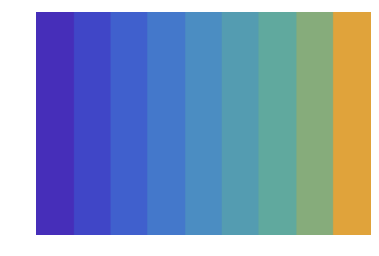

[['southeast_asia', '#462eb9'], ['south_asia', '#4147c7'], ['japan_korea', '#4160cd'], ['china', '#4478cb'], ['west_asia', '#4b8dc2'], ['europe', '#559db2'], ['oceania', '#60a99e'], ['south_america', '#87ad7b'], ['north_america', '#e0a33b']]


In [19]:
zika_region_cmap = [
    ["southeast_asia",     "#462EB9"],
    ["oceania",            "#3F4FCC"],
    ["china",              "#4271CE"],
    ["japan_korea",        "#4B8DC2"],
    ["europe",             "#58A2AC"],
    ["south_america",      "#69B091"],
    ["north_america",      "#E0A33B"]]

missing_dengue_regions = set(grouped_locations.keys()).difference(set(i[0] for i in zika_region_cmap))
print missing_dengue_regions

dengue_regions = ["southeast_asia", 
                  'south_asia',
                  "japan_korea", 
                  "china", 
                  'west_asia',
                  "europe",
                  "oceania", 
                  "south_america", 
                  "north_america"]

print interpolate_colors(zika_region_cmap, dengue_regions)

In [21]:
# Old World: "#462EB9", "#403DC5", "#3F4FCC", "#3F60D0", "#4271CE", "#4580CA", "#4B8DC2", "#5199B8", "#58A2AC"
zika_old_world = [
    ["thailand",           "#462EB9"],
    ["singapore",          "#403DC5"],
    ["french_polynesia",   "#3F4FCC"],
    ["american_samoa",	   "#3F60D0"],
    ["tonga",	           "#4271CE"],
    ["china",			   "#4580CA"],
    ["japan",			   "#4B8DC2"],
    ["italy",			   "#5199B8"]]
# South America: "#60AA9F", "#69B091", "#73B584", "#7DB877", "#89BB6B", "#95BD60", "#A2BE57", "#AFBD4F"
zika_south_america = [
    ["brazil",  		   "#60AA9F"],
    ["ecuador",  		   "#7DB877"],
    ["colombia",  		   "#89BB6B"],
    ["french_guiana",  	   "#95BD60"],
    ["suriname",  		   "#A2BE57"],
    ["venezuela",  		   "#AFBD4F"]]

# Central and North America: "#BBBC49", "#C6B944", "#D0B440", "#D9AD3D", "#E0A33B", "#E49838", "#E68835", "#E67732", "#E4632E", "#E04E2A", "#DE3926"
zika_central_north_america = [
    ["panama",             "#BBBC49"],
    ["honduras",           "#C6B944"],
    ["guatemala",  		   "#D0B440"],
    ["mexico",             "#D9AD3D"],
    ["martinique",  	   "#E0A33B"],
    ["guadeloupe",         "#E49838"],
    ["usvi",               "#E68835"],
    ["puerto_rico",  	   "#E67732"],
    ["jamaica",            "#E4632E"],
    ["dominican_republic", "#E4632E"],
    ["haiti",  			   "#E04E2A"],
    ["usa",                "#DE3926"]]

In [22]:
print grouped_locations.keys()

['europe', 'oceania', 'south_america', 'africa', 'southeast_asia', 'china', 'south_asia', 'japan_korea', 'west_asia', 'north_america', '?']
